In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (3).csv


In [28]:
data=pd.read_csv('Company_Data.csv',encoding="utf-8")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
data.shape

(400, 11)

In [31]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [32]:
df=data.copy()
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


# Converting target variable to categorical data

In [33]:
df.insert(11,'Sales_class',"")

for i in range(0,len(df['Sales']),1):
  if df['Sales'].iloc[i]<=7.5:
    df['Sales_class'].iloc[i]='Low'
  else:
     df['Sales_class'].iloc[i]='High'

<ipython-input-33-a3a3f2d5dc6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='High'
<ipython-input-33-a3a3f2d5dc6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='Low'


In [34]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [35]:
df.drop(['Sales'],axis=1,inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Label Encoding

In [36]:
LE=LabelEncoder()
df['ShelveLoc']=LE.fit_transform(df['ShelveLoc'])
df['Urban']=LE.fit_transform(df['Urban'])
df['US']=LE.fit_transform(df['US'])
df['Sales_class']=LE.fit_transform(df['Sales_class'])

In [37]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


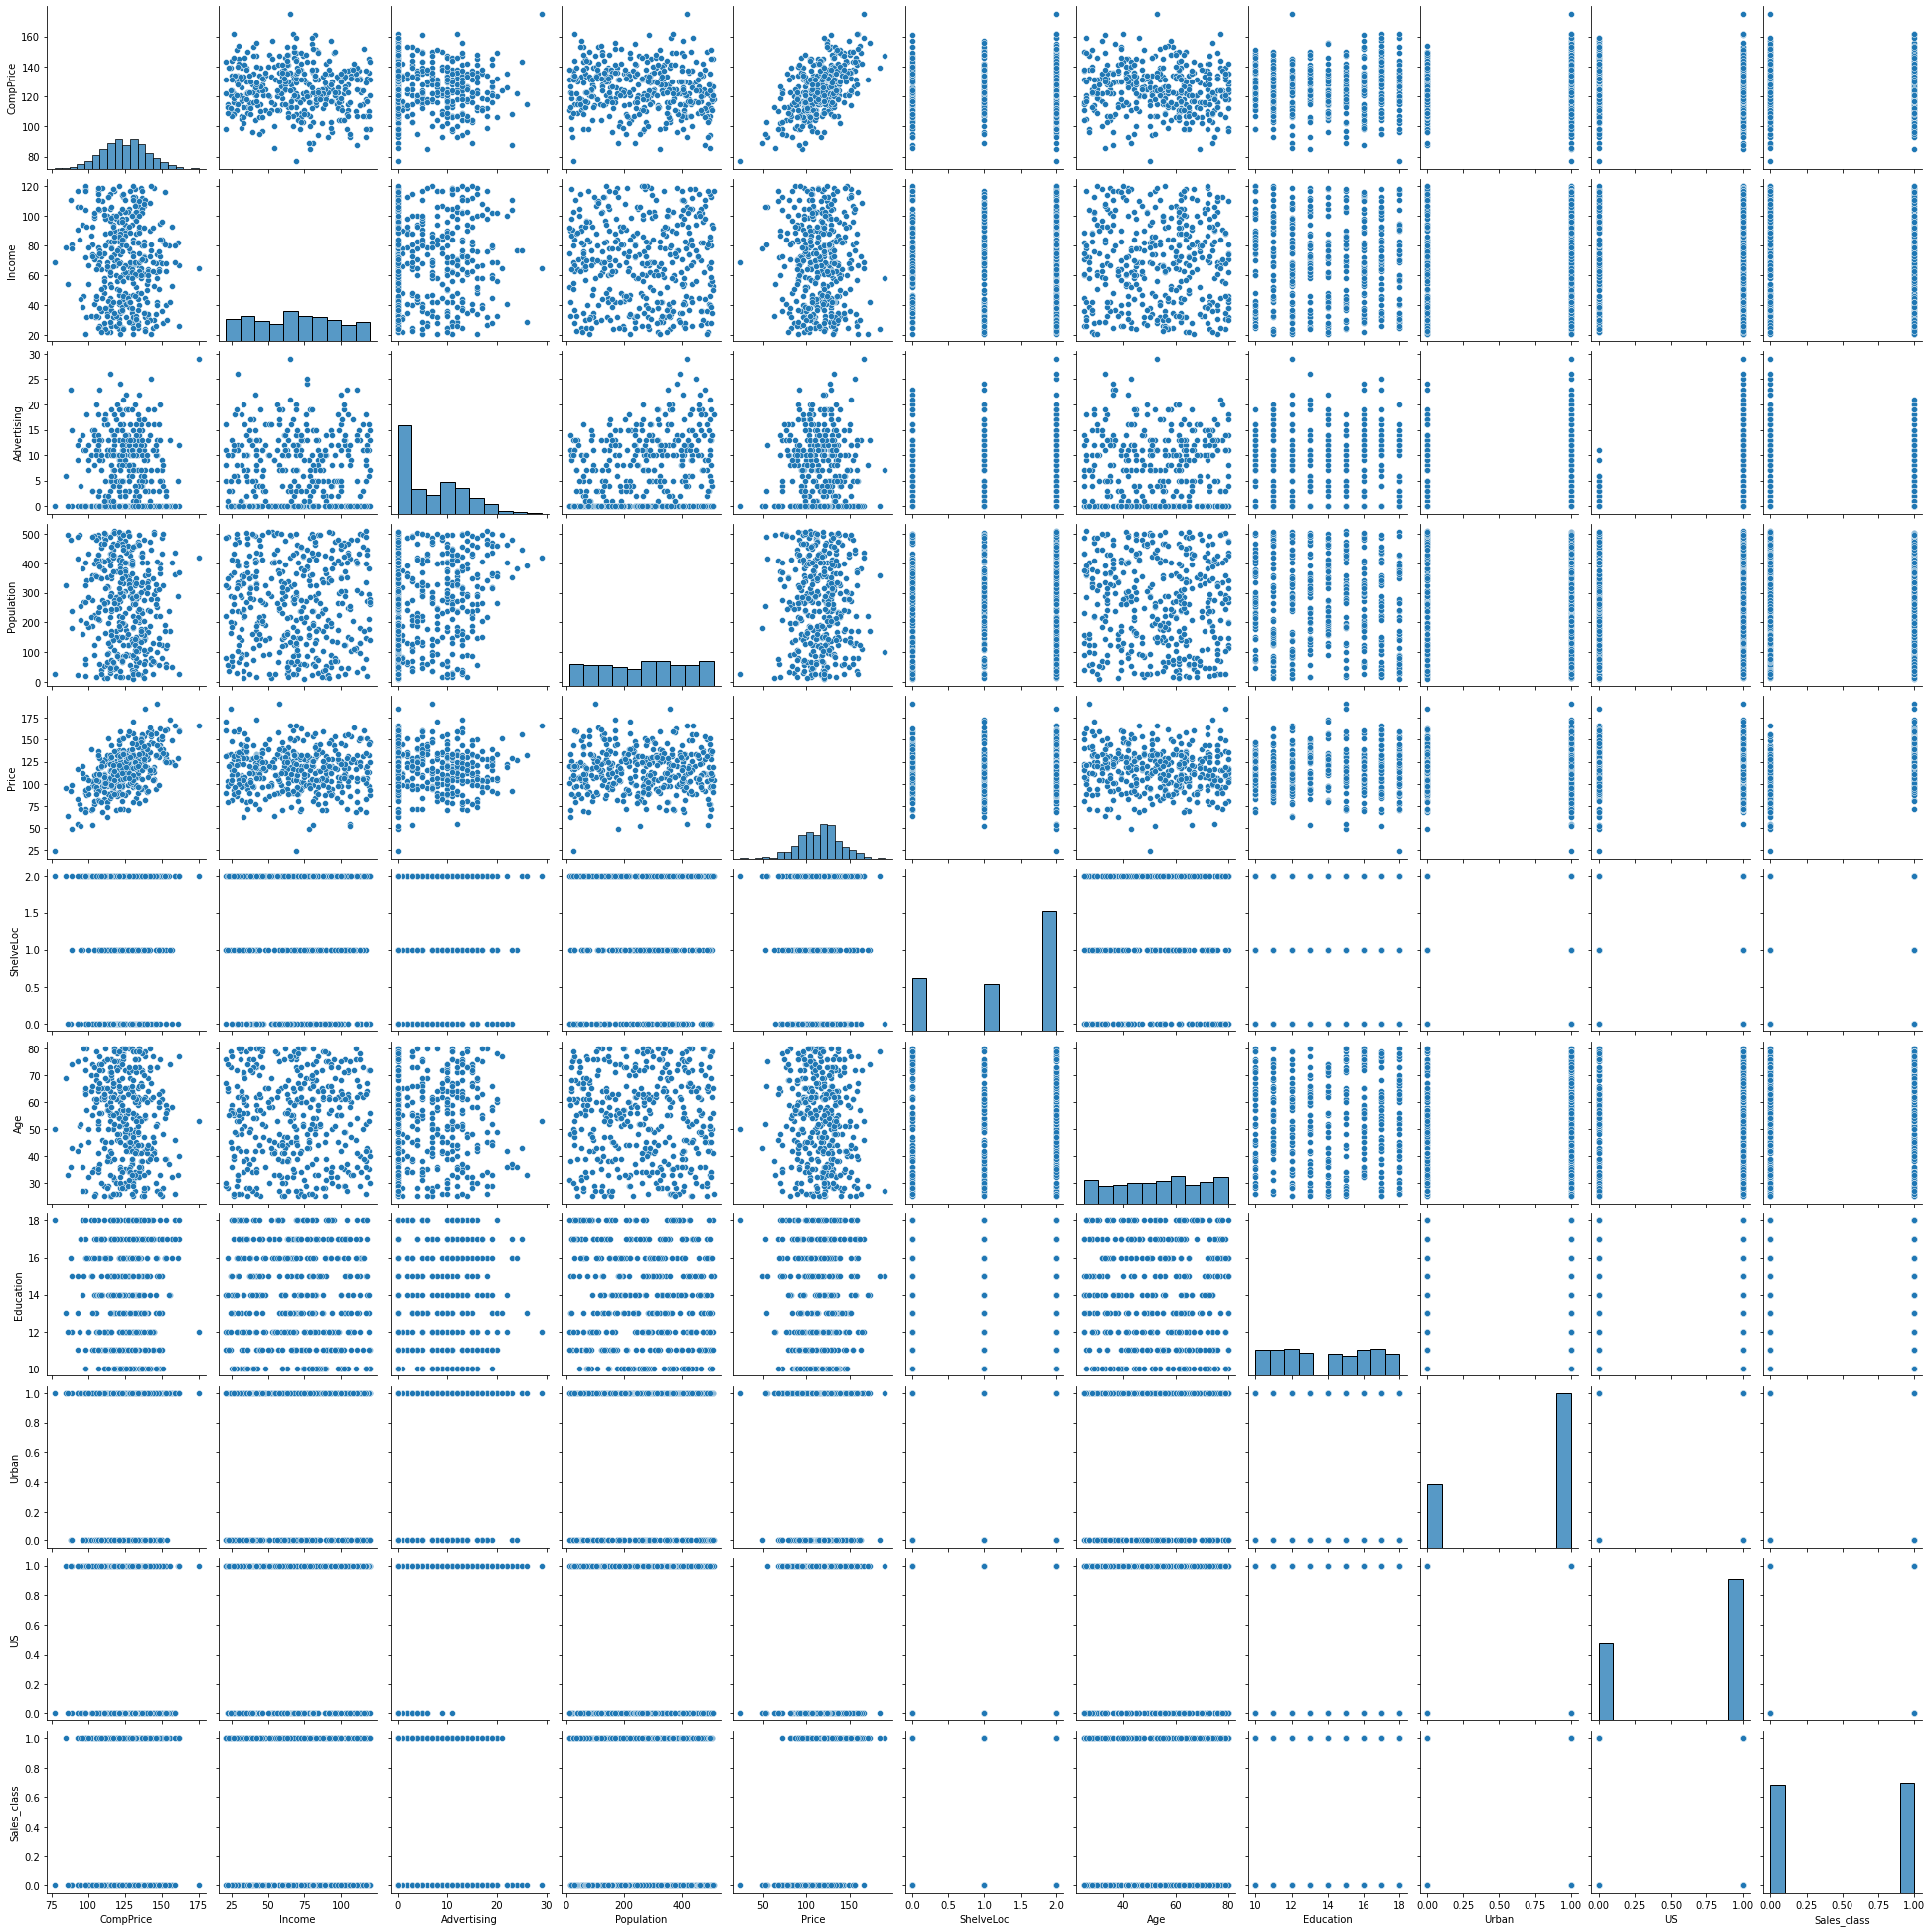

In [38]:
# Let'splot pair to plot to visualise the attributes all at once
sns.pairplot(df)

In [39]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_class,Urban_1,US_1
0,138,73,11,276,120,0,42,17,0,1,1
1,111,48,16,260,83,1,65,10,0,1,1
2,113,35,10,269,80,2,59,12,0,1,1
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,1,1
396,139,23,3,37,120,2,55,11,1,0,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Sales_class  400 non-null    int64
 9   Urban_1      400 non-null    uint8
 10  US_1         400 non-null    uint8
dtypes: int64(9), uint8(2)
memory usage: 29.0 KB


In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [42]:
x=df.iloc[:,0:6]
y=df['Sales_class']


In [43]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,138,73,11,276,120,0
1,111,48,16,260,83,1
2,113,35,10,269,80,2
3,117,100,4,466,97,2
4,141,64,3,340,128,0
...,...,...,...,...,...,...
395,138,108,17,203,128,1
396,139,23,3,37,120,2
397,162,26,12,368,159,2
398,100,79,7,284,95,0


In [44]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales_class, Length: 400, dtype: int64

In [45]:
df['Sales_class'].unique()

array([0, 1])

In [46]:
df.Sales_class.value_counts()


1    202
0    198
Name: Sales_class, dtype: int64

In [47]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Sales_class',
 'Urban_1',
 'US_1']

In [48]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
from sklearn import tree

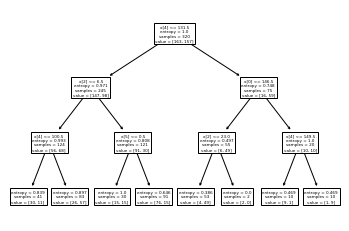

In [51]:
#PLot the decision tree
tree.plot_tree(model);

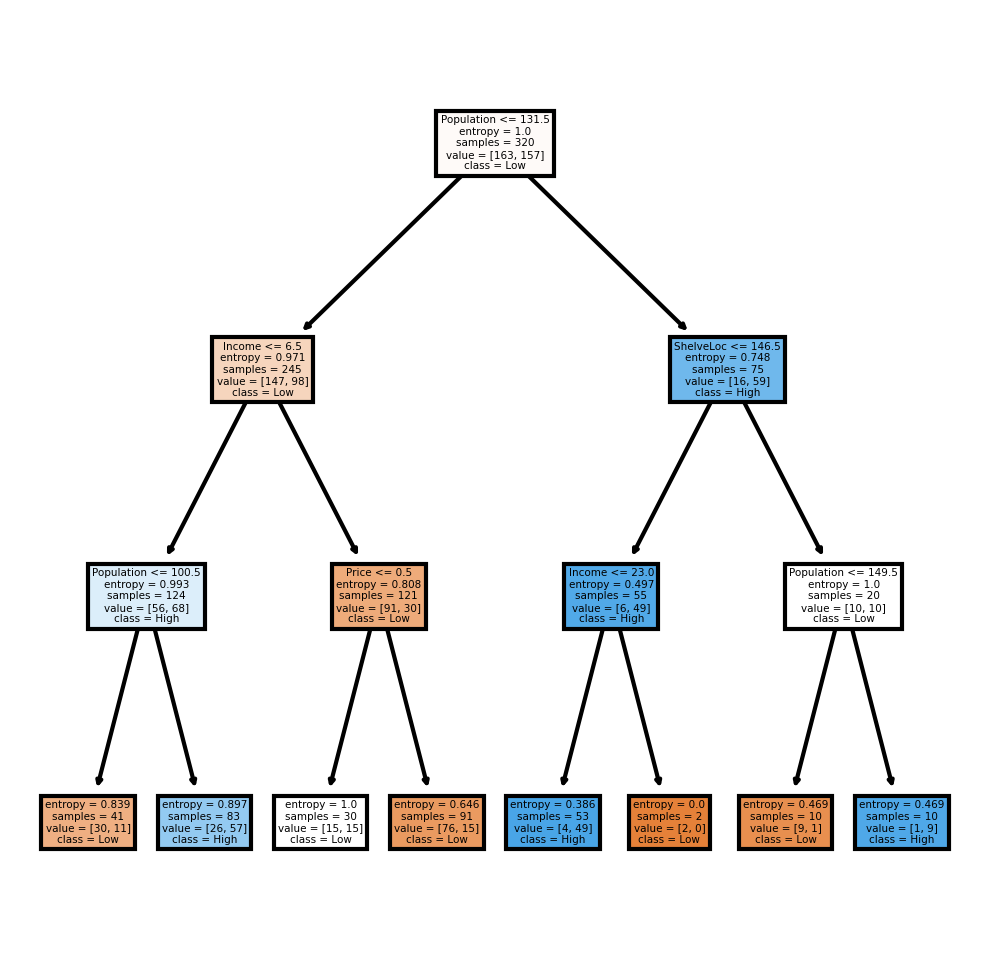

In [52]:
fn=['ShelveLoc','CompPrice','Income','Advertising','Population','Price']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [53]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    42
1    38
dtype: int64

In [54]:
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [55]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_class,,
0,27,8
1,15,30


In [56]:
# Accuracy 
np.mean(preds==y_test)


0.7125

Building Decision Tree Classifier (CART) using Gini Criteria

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [58]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7125

Decision Tree Regression Example

In [60]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [61]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
#Find the accuracy
model.score(X_test,y_test)

-0.8209880205433993